In [ ]:
!pip install nlp
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.7 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
from datasets import load_dataset


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    y_pred = np.argmax(y_pred,axis=1)

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


In [ ]:
dataset =  load_dataset('emotion')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets,labels

In [ ]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 0)

In [ ]:
from tensorflow.keras.preprocessing.text   import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = 1000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
tweets[0]

'i didnt feel humiliated'

<function matplotlib.pyplot.show(close=None, block=None)>

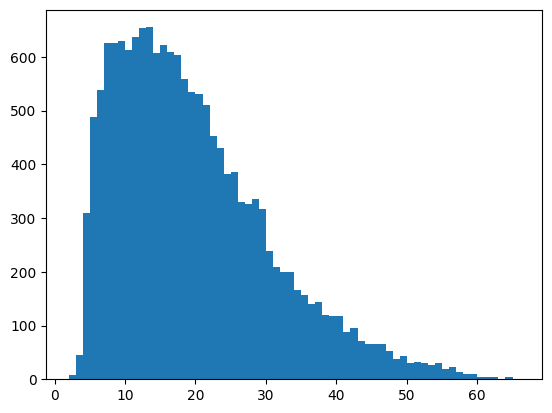

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show

In [ ]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequence(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences,truncating='post',padding ='post',maxlen = maxlen)
  return padded

In [ ]:
padding_train_seq = get_sequence(tokenizer, tweets)

In [ ]:
padding_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


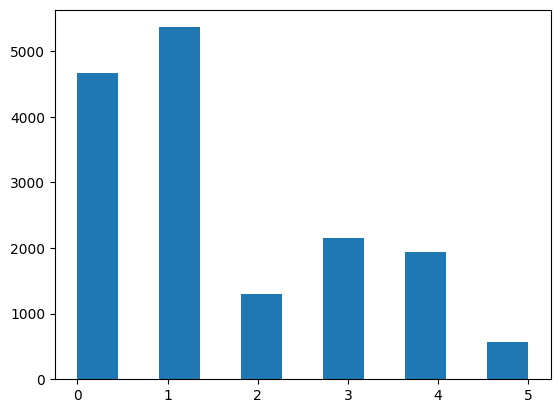

In [ ]:
plt.hist(labels,bins=11)
plt.show()

In [ ]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_classes = dict((v,k) for k,v in class_to_index.items())

In [ ]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [ ]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [ ]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[8115])

1


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000,16,input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6,activation = 'softmax',)

])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [ ]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequence(tokenizer,val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[0],val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model.fit(
     padding_train_seq,train_labels,
    validation_data=(val_seq,val_labels),
     epochs = 20,
     callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 2)
     ]
)

Epoch 1/20
500/500 [==============================] - 41s 46ms/step - loss: 1.3048 - accuracy: 0.4831 - val_loss: 0.8571 - val_accuracy: 0.6795
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.7172 - accuracy: 0.7424 - val_loss: 0.6649 - val_accuracy: 0.7635
Epoch 3/20
500/500 [==============================] - 8s 17ms/step - loss: 0.5201 - accuracy: 0.8218 - val_loss: 0.5018 - val_accuracy: 0.8375
Epoch 4/20
500/500 [==============================] - 7s 15ms/step - loss: 0.4278 - accuracy: 0.8548 - val_loss: 0.4480 - val_accuracy: 0.8460
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.3721 - accuracy: 0.8672 - val_loss: 0.4124 - val_accuracy: 0.8590
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3379 - accuracy: 0.8776 - val_loss: 0.4208 - val_accuracy: 0.8520
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.3201 - accuracy: 0.8812 - val_loss: 0.3800 - val_accuracy: 0.859

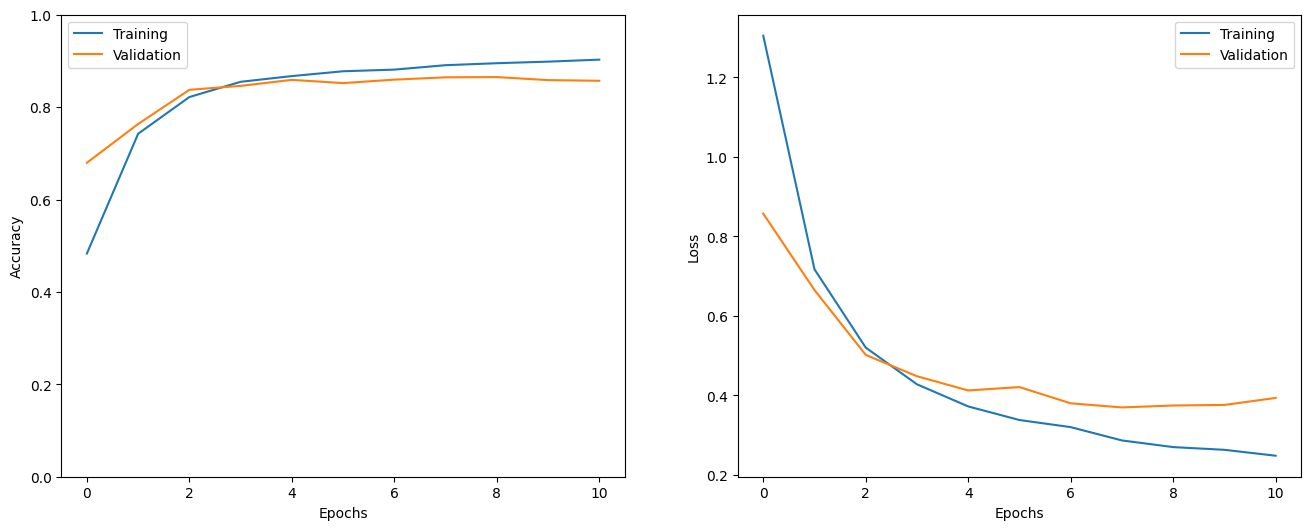

In [ ]:
show_history(h)

In [ ]:
test_tweets , test_labels = get_tweet(test)
test_seq = get_sequence(tokenizer,test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
_= model.evaluate(test_seq,test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.3682 - accuracy: 0.8645


In [ ]:
i = random.randint(0, len(test_labels)-1)
print('Sentence',test_tweets[i])
print('Emotion',index_to_classes[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis = 1))[0]
pred_class = index_to_classes[np.argmax(p).astype('uint8')]
print('predicted emotion:',pred_class)

Sentence i do feel terribly remourseful that i didnt stay faithful to my plans and get him sooner
Emotion 2
2/2 [==============================] - 2s 8ms/step
predicted emotion: 2


In [ ]:
preds = model.predict(test_seq)

63/63 [==============================] - 0s 6ms/step


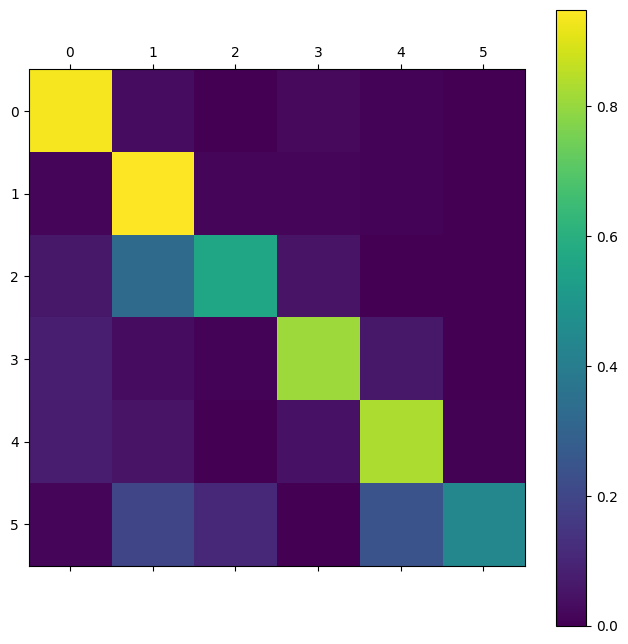

In [ ]:
show_confusion_matrix(test_labels, preds, list(classes))